In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Use the Inspector to explore the database and print table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
#Use the Inspector to print column names and types of measurement table
column = inspector.get_columns('measurement')
for c in column:
    print(c['name'], c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#Use the Inspector to print column names and types of station table
column = inspector.get_columns('station')
for c in column:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [13]:
# Perform a query to retrieve the data and precipitation scores
prcp_data=session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>'2016-08-23').\
group_by(Measurement.date).order_by(Measurement.date.desc()).all()

prcp_data



[('2017-08-23', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-21', 0.0),
 ('2017-08-20', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-17', 0.0),
 ('2017-08-16', 0.0),
 ('2017-08-15', 0.02),
 ('2017-08-14', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-09', 0.0),
 ('2017-08-08', 0.0),
 ('2017-08-07', 0.0),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.0),
 ('2017-08-04', 0.02),
 ('2017-08-03', 0.0),
 ('2017-08-02', 0.0),
 ('2017-08-01', 0.02),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.0),
 ('2017-07-29', 0.0),
 ('2017-07-28', 0.0),
 ('2017-07-27', 0.0),
 ('2017-07-26', 0.0),
 ('2017-07-25', 0.0),
 ('2017-07-24', 0.05),
 ('2017-07-23', 0.0),
 ('2017-07-22', 0.03),
 ('2017-07-21', 0.0),
 ('2017-07-20', 0.03),
 ('2017-07-19', 0.0),
 ('2017-07-18', 0.05),
 ('2017-07-17', 0.03),
 ('2017-07-16', 0.02),
 ('2017-07-15', 0.0),
 ('2017-07-14', 0.02),
 ('2017-07-13', 0.07),
 ('2017-07-12', 0.0),
 ('2017-07-11', 0.0),
 ('2017-07-10', 0.0),

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data_df=pd.DataFrame(prcp_data)
prcp_data_df.head(20)

,date,prcp
0,2017-08-23,0.00
1,2017-08-22,0.00
2,2017-08-21,0.00
3,2017-08-20,0.00
4,2017-08-19,0.00
5,2017-08-18,0.00
6,2017-08-17,0.00
7,2017-08-16,0.00
8,2017-08-15,0.02
9,2017-08-14,0.00


In [15]:
# Sort the dataframe by date
sorted_prcp_data_df=prcp_data_df.sort_values("date", ascending=False)

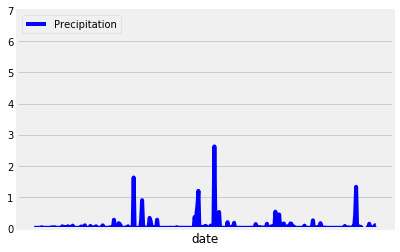

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

# Values for y-axis
prcp_data_y = sorted_prcp_data_df["prcp"]

#Define x-axis label
plt.xlabel("date")

#Define y-axis limits
plt.ylim(0.0, 7.0)

plt.xticks([])


plt.plot(prcp_data_y, c="blue", label="Precipitation")

#Create plot legend
legend=plt.legend(fontsize="medium", loc="upper left")

plt.grid(True)

#Save the plot as prcp_plot.png
plt.savefig("prcp_plot.png")

#show the plot
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_data_df.describe()

,prcp
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
measurement_station_data=session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
measurement_station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_data=session.query(Station.name, func.count(Measurement.id)).\
    filter(Measurement.station==Station.station).\
    group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
station_data

[('WAIHEE 837.5, HI US', 2772),
 ('WAIKIKI 717.2, HI US', 2724),
 ('KANEOHE 838.1, HI US', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('PEARL CITY, HI US', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# Most active station - USC00519281
sel=[Measurement.station,
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)]
most_active_temp_stats = session.query(*sel).\
    filter(Measurement.station=='USC00519281').all()
most_active_temp_stats


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data=session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
temp_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Choose the station with the highest number of temperature observations.

temp_data=session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
temp_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Query the last 12 months of temperature observation data for this station
last12_temp_data=session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station=='USC00519281').\
filter(Measurement.date>='2016-08-23').\
filter(Measurement.date<'2017-08-24').all()
last12_temp_data

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [25]:
#Create dataframe of last 12 months of temperature for station with max observations
temp_data_df=pd.DataFrame(last12_temp_data)
temp_data_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [26]:
temp_data_group = temp_data_df.groupby(["tobs"])
# Calculate averages for combat stats using the .mean() method
temp_count = temp_data_group.count()
#temp_count

In [27]:
temp_data_df.describe()

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


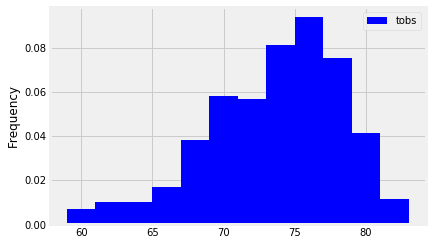

In [28]:
# Create histogram of last 12 months of temperature data for station with max observations

# Get values for x-axis
temp_data_xaxis=temp_data_df["tobs"]

#Define y-axis label
plt.ylabel("Frequency")

#ytickformat('int')
plt.grid(True)


# Write data to plot function
plt.hist(temp_data_xaxis, density='True', bins=12, color='blue', label='tobs')


#Create plot legend
legend=plt.legend(fontsize="medium", loc="upper right")



#Save the plot as prcp_plot.png
plt.savefig("temp_plot.png")

plt.show()
 

In [29]:
#The next few cells are for testing flask.

In [30]:
#Test for Flask exercise
sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
temp_stats_results=session.query(Measurement.date,*sel).filter(Measurement.date>'2017-01-01').\
group_by(Measurement.date).order_by(Measurement.date.desc()).all()


#group_by(Measurement.date).order_by(Measurement.date.desc()).all()
temp_stats_results    

    

[('2017-08-23', 76.0, 80.25, 82.0),
 ('2017-08-22', 76.0, 80.0, 82.0),
 ('2017-08-21', 76.0, 79.5, 82.0),
 ('2017-08-20', 78.0, 79.66666666666667, 81.0),
 ('2017-08-19', 71.0, 78.75, 85.0),
 ('2017-08-18', 76.0, 78.0, 80.0),
 ('2017-08-17', 72.0, 77.25, 83.0),
 ('2017-08-16', 71.0, 77.0, 82.0),
 ('2017-08-15', 70.0, 77.2, 82.0),
 ('2017-08-14', 75.0, 78.2, 81.0),
 ('2017-08-13', 77.0, 80.6, 84.0),
 ('2017-08-12', 74.0, 79.0, 83.0),
 ('2017-08-11', 72.0, 78.0, 81.0),
 ('2017-08-10', 75.0, 79.25, 81.0),
 ('2017-08-09', 71.0, 77.33333333333333, 81.0),
 ('2017-08-08', 74.0, 78.5, 82.0),
 ('2017-08-07', 78.0, 80.5, 83.0),
 ('2017-08-06', 79.0, 81.4, 83.0),
 ('2017-08-05', 77.0, 80.0, 82.0),
 ('2017-08-04', 77.0, 80.0, 82.0),
 ('2017-08-03', 76.0, 79.0, 81.0),
 ('2017-08-02', 73.0, 79.0, 83.0),
 ('2017-08-01', 72.0, 74.5, 77.0),
 ('2017-07-31', 74.0, 78.71428571428571, 82.0),
 ('2017-07-30', 78.0, 80.6, 84.0),
 ('2017-07-29', 77.0, 80.5, 83.0),
 ('2017-07-28', 73.0, 79.14285714285714, 81.0),

In [31]:
# TEST FOR FLASK Unpact query list
temp_stats_sdate = list(np.ravel(temp_stats_results))
temp_stats_sdate

['2017-08-23',
 '76.0',
 '80.25',
 '82.0',
 '2017-08-22',
 '76.0',
 '80.0',
 '82.0',
 '2017-08-21',
 '76.0',
 '79.5',
 '82.0',
 '2017-08-20',
 '78.0',
 '79.66666666666667',
 '81.0',
 '2017-08-19',
 '71.0',
 '78.75',
 '85.0',
 '2017-08-18',
 '76.0',
 '78.0',
 '80.0',
 '2017-08-17',
 '72.0',
 '77.25',
 '83.0',
 '2017-08-16',
 '71.0',
 '77.0',
 '82.0',
 '2017-08-15',
 '70.0',
 '77.2',
 '82.0',
 '2017-08-14',
 '75.0',
 '78.2',
 '81.0',
 '2017-08-13',
 '77.0',
 '80.6',
 '84.0',
 '2017-08-12',
 '74.0',
 '79.0',
 '83.0',
 '2017-08-11',
 '72.0',
 '78.0',
 '81.0',
 '2017-08-10',
 '75.0',
 '79.25',
 '81.0',
 '2017-08-09',
 '71.0',
 '77.33333333333333',
 '81.0',
 '2017-08-08',
 '74.0',
 '78.5',
 '82.0',
 '2017-08-07',
 '78.0',
 '80.5',
 '83.0',
 '2017-08-06',
 '79.0',
 '81.4',
 '83.0',
 '2017-08-05',
 '77.0',
 '80.0',
 '82.0',
 '2017-08-04',
 '77.0',
 '80.0',
 '82.0',
 '2017-08-03',
 '76.0',
 '79.0',
 '81.0',
 '2017-08-02',
 '73.0',
 '79.0',
 '83.0',
 '2017-08-01',
 '72.0',
 '74.5',
 '77.0',
 '20

In [32]:
# TEST for FLASK Create a dictionary from the row data and append to a list of all temperature statistics
all_temp_stats = []
for tstats in temp_stats_results:
    (tdate, tmin, tavg, tmax)=tstats
    temp_sdate_dict = {}
    temp_sdate_dict["date"] = tdate
    temp_sdate_dict["min"] = tmin
    temp_sdate_dict['avg'] = tavg
    temp_sdate_dict['max'] = tmax
    all_temp_stats.append(temp_sdate_dict)

In [33]:
prcp_data_results=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>'2016-08-23').filter(Measurement.date<'2017-08-24').\
    order_by(Measurement.date.desc()).all()

    # Create a dictionary from the row data and append to a list of all precipitation scores
all_prcp_scores = []
for row in prcp_data_results:
#     print("row", row)
#     print(row.date, row.prcp)
    prcp_dict = {"date" : row.date, "prcp": row.prcp}
    all_prcp_scores.append(prcp_dict)

In [34]:
all_prcp_scores

[{'date': '2017-08-23', 'prcp': 0.0},
 {'date': '2017-08-23', 'prcp': 0.0},
 {'date': '2017-08-23', 'prcp': 0.08},
 {'date': '2017-08-23', 'prcp': 0.45},
 {'date': '2017-08-22', 'prcp': 0.0},
 {'date': '2017-08-22', 'prcp': 0.0},
 {'date': '2017-08-22', 'prcp': 0.5},
 {'date': '2017-08-21', 'prcp': 0.0},
 {'date': '2017-08-21', 'prcp': 0.02},
 {'date': '2017-08-21', 'prcp': None},
 {'date': '2017-08-21', 'prcp': 0.56},
 {'date': '2017-08-20', 'prcp': 0.0},
 {'date': '2017-08-20', 'prcp': 0.01},
 {'date': '2017-08-20', 'prcp': None},
 {'date': '2017-08-19', 'prcp': 0.0},
 {'date': '2017-08-19', 'prcp': 0.0},
 {'date': '2017-08-19', 'prcp': None},
 {'date': '2017-08-19', 'prcp': 0.09},
 {'date': '2017-08-18', 'prcp': 0.0},
 {'date': '2017-08-18', 'prcp': 0.0},
 {'date': '2017-08-18', 'prcp': 0.06},
 {'date': '2017-08-18', 'prcp': None},
 {'date': '2017-08-17', 'prcp': 0.0},
 {'date': '2017-08-17', 'prcp': 0.05},
 {'date': '2017-08-17', 'prcp': 0.01},
 {'date': '2017-08-17', 'prcp': 0.13}

In [35]:
# Query to calculate and return temp stats given start date only.
start_date = dt.date(2016,8,23)
sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
temp_stats_results=session.query(*sel).filter(Measurement.date>=start_date).all()
temp_stats_results
    

[(58.0, 74.59058295964125, 87.0)]

In [36]:
# Unpact query list
temp_stats_sdate = list(np.ravel(temp_stats_results))

In [37]:
temp_stats_sdate

[58.0, 74.59058295964125, 87.0]

In [38]:
# Query temperature data for Flask exercise to see if query works.
tobs_data=session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date>'2016-08-23').filter(Measurement.date<'2017-08-24').\
    order_by(Measurement.date.desc()).all()
tobs_data

[('2017-08-23', 'USC00519397', 81.0),
 ('2017-08-23', 'USC00514830', 82.0),
 ('2017-08-23', 'USC00519523', 82.0),
 ('2017-08-23', 'USC00516128', 76.0),
 ('2017-08-22', 'USC00519397', 82.0),
 ('2017-08-22', 'USC00519523', 82.0),
 ('2017-08-22', 'USC00516128', 76.0),
 ('2017-08-21', 'USC00519397', 81.0),
 ('2017-08-21', 'USC00514830', 79.0),
 ('2017-08-21', 'USC00519523', 82.0),
 ('2017-08-21', 'USC00516128', 76.0),
 ('2017-08-20', 'USC00519397', 81.0),
 ('2017-08-20', 'USC00514830', 80.0),
 ('2017-08-20', 'USC00516128', 78.0),
 ('2017-08-19', 'USC00519397', 79.0),
 ('2017-08-19', 'USC00514830', 80.0),
 ('2017-08-19', 'USC00519523', 85.0),
 ('2017-08-19', 'USC00516128', 71.0),
 ('2017-08-18', 'USC00519397', 80.0),
 ('2017-08-18', 'USC00514830', 77.0),
 ('2017-08-18', 'USC00519281', 79.0),
 ('2017-08-18', 'USC00516128', 76.0),
 ('2017-08-17', 'USC00514830', 78.0),
 ('2017-08-17', 'USC00519523', 83.0),
 ('2017-08-17', 'USC00519281', 76.0),
 ('2017-08-17', 'USC00516128', 72.0),
 ('2017-08-1